In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as AC


In [2]:
#load in data
customer_data = pd.read_csv('customer_data.csv')

In [3]:
customer_data.shape #check the dimensions

(200, 5)

In [4]:
customer_data.head() #let's peek at our data frame

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending score')

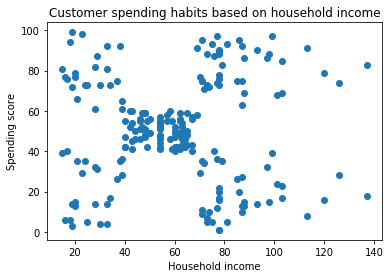

In [5]:
data = customer_data.iloc[:,3:5].values #removes first 3 columns leaving only annual income and spending score

plt.scatter(data[:,0],data[:,1]) #let's look at our data
plt.title('Customer spending habits based on household income')
plt.xlabel('Household income')
plt.ylabel('Spending score')

### The plot shows some clear grouping

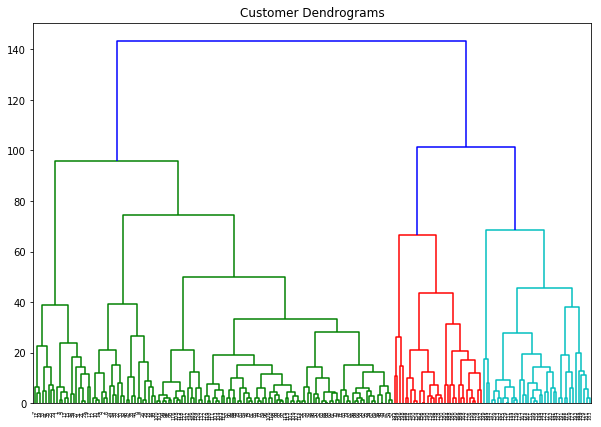

In [6]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = sch.dendrogram(sch.linkage(data,method='complete')) #try with different linkage methods

#### Also, take a moment to examine your dendrogram for distinct clusters at different "heights"

In [7]:
cluster = AC(n_clusters=5,affinity='euclidean',linkage='complete')
cluster.fit_predict(data) #tells us what clusters our data lives in out of the 5

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

Text(0.5, 1.0, 'Customer spending habits based on household income')

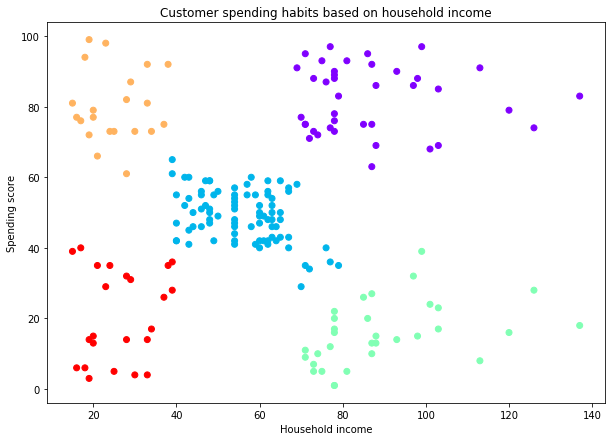

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_,cmap='rainbow')
plt.xlabel('Household income')
plt.ylabel('Spending score')
plt.title('Customer spending habits based on household income')
#what inferences might we make from these clusters?

## Let's look at the same problem utilizing K-means clustering


In [9]:
#import Kmeans tool from sklearn
from sklearn.cluster import KMeans

Let's plot an elbow test!

Typically, as a good rule of thumb this will show you a reasonable number of clusters to use.
We will pick the number where the line begins to flatten.

In [10]:
nk = range(1,20) #generate list from 1 to 10 as number of clusters for elbow test

In [11]:
kmeans=[KMeans(n_clusters=i) for i in nk] #set up array of the K-means algorithm to test data over each number of clusters

In [12]:
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))] #Create array of scores for data for k-means algos

Text(0, 0.5, 'Score')

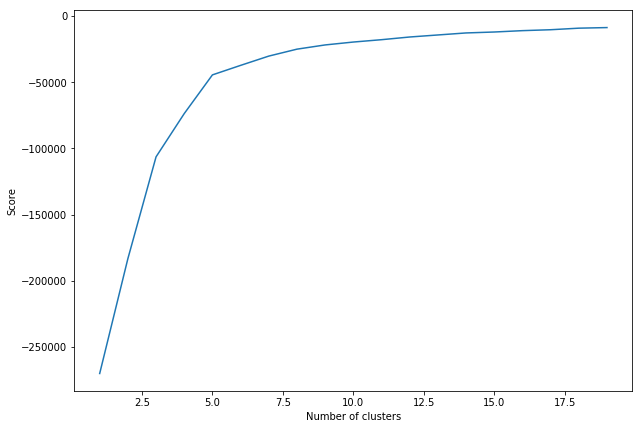

In [13]:
#plot your elbow test!
plt.figure(figsize=(10,7))
plt.plot(nk,score)
plt.xlabel('Number of clusters')
plt.ylabel('Score')

In [14]:
kmeans=KMeans(n_clusters=5)
kmeans_out=kmeans.fit(data)
kmeans_out

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'Spending score')

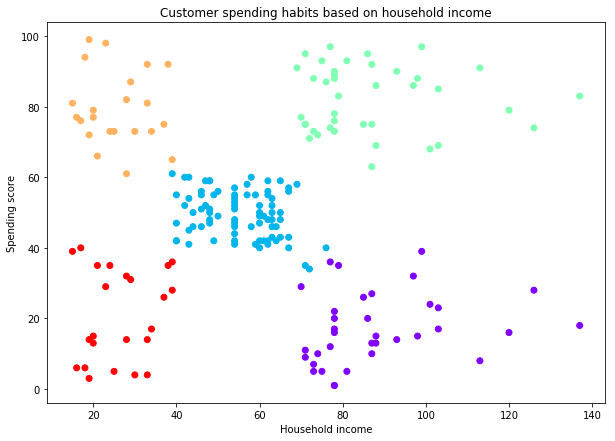

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=kmeans_out.labels_,cmap='rainbow')
plt.title('Customer spending habits based on household income')
plt.xlabel('Household income')
plt.ylabel('Spending score')

## Dimensionality reduction with PCA

We just got a little more data on our customers! 

However, we now have several variables to work with.

You know that there are very good tools for dimensionality reduction, and you are going to implement PCA
on this data to make sure you are examining the most relevant variables of your data.





In [16]:
#load in the extended customer data
customer_data = pd.read_csv('customer_data_extended.csv')

In [17]:
#let's get the dimensions
customer_data.shape

(200, 6)

In [18]:
#Let's take a look at the fields we have in our data frame.
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Number of items bought
0,1,Male,19,15,39,4
1,2,Male,21,15,81,27
2,3,Female,20,16,6,1
3,4,Female,23,16,77,23
4,5,Female,31,17,40,8


In [19]:
#We now have Gender, Age, Annual Income, Spending Score, and Number of items bought for each customer
#Let's run PCA to find out which variables are responsible for most of the variance in our dataset!

#import necessary tools
from mpl_toolkits.mplot3d import Axes3D #for plotting 3D graphs

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition #for PCA tool
from sklearn import datasets 



data=customer_data.iloc[:,3:6].values #removes first 3 columns 
data.shape

X = StandardScaler().fit_transform(data)
X

/Users/flatironstudentaccount/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/flatironstudentaccount/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.73899919, -0.43480148, -1.26323321],
       [-1.73899919,  1.19570407,  2.01049793],
       [-1.70082976, -1.71591298, -1.69024162],
       [-1.70082976,  1.04041783,  1.44115338],
       [-1.66266033, -0.39597992, -0.69388867],
       [-1.66266033,  1.00159627,  0.16012815],
       [-1.62449091, -1.71591298, -1.69024162],
       [-1.62449091,  1.70038436, -0.40921639],
       [-1.58632148, -1.83237767, -1.69024162],
       [-1.58632148,  0.84631002,  1.01414497],
       [-1.58632148, -1.4053405 , -0.97856094],
       [-1.58632148,  1.89449216,  2.43750634],
       [-1.54815205, -1.36651894, -1.40556935],
       [-1.54815205,  1.04041783,  0.30246429],
       [-1.54815205, -1.44416206, -0.8362248 ],
       [-1.54815205,  1.11806095,  1.01414497],
       [-1.50998262, -0.59008772, -1.12089708],
       [-1.50998262,  0.61338066, -0.40921639],
       [-1.43364376, -0.82301709, -1.12089708],
       [-1.43364376,  1.8556706 ,  2.15283407],
       [-1.39547433, -0.59008772, -1.120

In [20]:
pca=decomposition.PCA() #set pca to be your PCA function
pc=pca.fit_transform(X) #apply pca to your data
pc.shape #sanity check for your life (What are the expected dimensions?)

(200, 3)

In [21]:
#covariance
pca.get_covariance() #What dimensions should this matrix have? Why?

array([[1.00502513, 0.00995261, 0.05640376],
       [0.00995261, 1.00502513, 0.97621819],
       [0.05640376, 0.97621819, 1.00502513]])

In [22]:
explained_var=pca.explained_variance_ratio_ #gives the percentage of variance from each component
explained_var #how many items should be in this array?

array([0.65785905, 0.3329532 , 0.00918775])

Text(0.5, 1.0, 'Explained variance ratio of principal components')

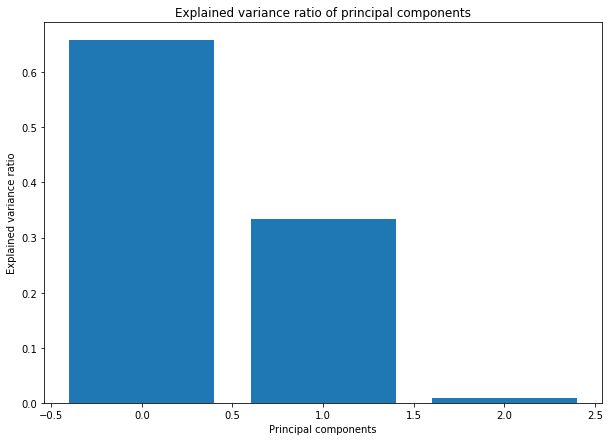

In [23]:
#Let's plot our explained variances to compare them
plt.figure(figsize=(10,7))
plt.bar(range(3),explained_var)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance ratio of principal components')

In [24]:
#Which components should we keep, and which should we throwaway?

Text(0.5, 0, 'Household income')

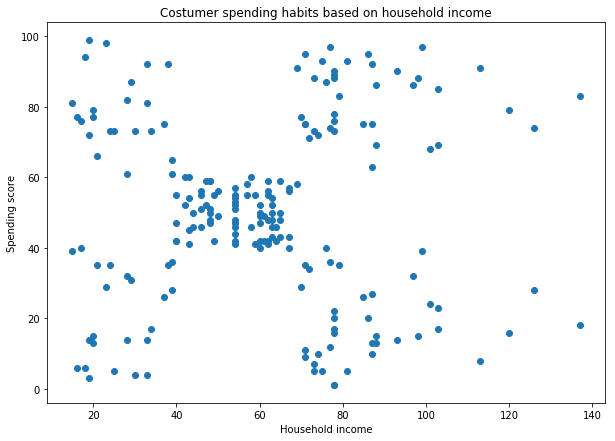

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1])
plt.title('Costumer spending habits based on household income')
plt.ylabel('Spending score')
plt.xlabel('Household income')

Text(0.5, 0, 'PC1')

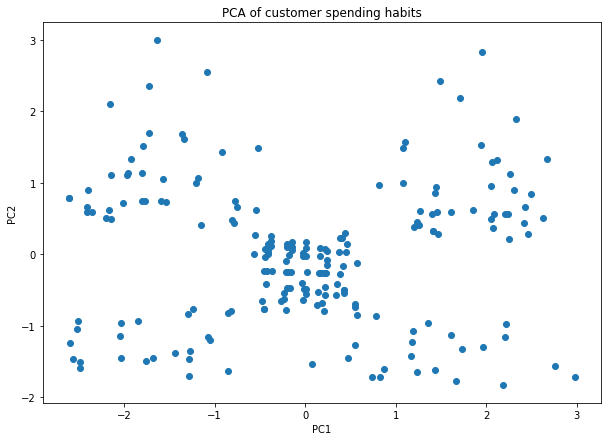

In [26]:
plt.figure(figsize=(10,7))
plt.title('PCA of customer spending habits')
plt.scatter(pc[:,0],pc[:,1])
plt.ylabel('PC2')
plt.xlabel('PC1')

Text(0.5, 0.92, 'Consumer spending habits')

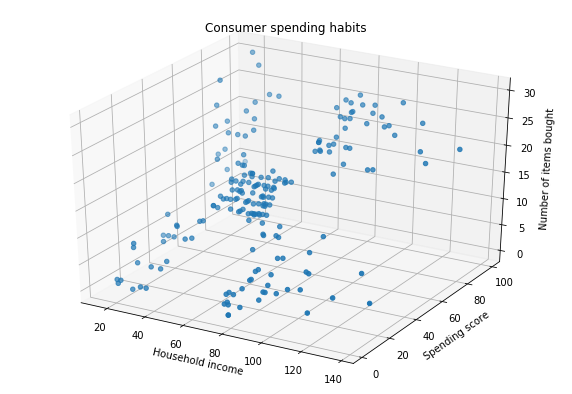

In [27]:
#Just for the sake of comparison, let's plot the 3d data
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter(data[:,0],data[:,1],data[:,2])
ax.set_xlabel('Household income')
ax.set_ylabel('Spending score')
ax.set_zlabel('Number of items bought')
ax.set_title('Consumer spending habits')

Text(0.5, 0.92, 'PCA for Consumer spending habits')

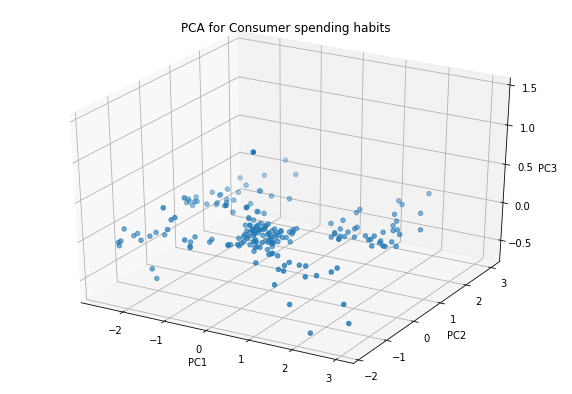

In [28]:
#Just for the sake of comparison, let's plot the 3d data
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter(pc[:,0],pc[:,1],pc[:,2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA for Consumer spending habits')